In [3]:
print(df_protocol.shape)
print(df_protocol.head())


(182357, 1)
                                             0
0  T_4850 T_0000000000 F - - - AC3 A05 spoof -
1  T_0858 T_0000000001 M - - - AC3 A07 spoof -
2  T_4075 T_0000000002 M - - - AC2 A04 spoof -
3  T_0938 T_0000000003 M - - - AC2 A08 spoof -
4  T_0610 T_0000000004 M - - - AC2 A05 spoof -


In [5]:
df_protocol = pd.read_csv(protocol_path, sep='\s+', header=None, engine="python")
print(df_protocol.shape)  # Should now have multiple columns
print(df_protocol.head())  # Verify the output


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\chint\AppData\Local\Temp\ipykernel_5456\1863288290.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_protocol = pd.read_csv(protocol_path, sep='\s+', header=None, engine="python")


(182357, 10)
        0             1  2  3  4  5    6    7      8  9
0  T_4850  T_0000000000  F  -  -  -  AC3  A05  spoof  -
1  T_0858  T_0000000001  M  -  -  -  AC3  A07  spoof  -
2  T_4075  T_0000000002  M  -  -  -  AC2  A04  spoof  -
3  T_0938  T_0000000003  M  -  -  -  AC2  A08  spoof  -
4  T_0610  T_0000000004  M  -  -  -  AC2  A05  spoof  -


In [9]:
df_protocol.columns = ['speaker_id', 'file_name', 'gender', 'unknown1', 'unknown2', 'unknown3', 'codec', 'attack_id', 'label', 'extra']


In [13]:
df_protocol = pd.read_csv(protocol_path, sep='\s+', header=None)
print(df_protocol.head())  # Check if columns are properly separated


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\chint\AppData\Local\Temp\ipykernel_5456\3288098021.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_protocol = pd.read_csv(protocol_path, sep='\s+', header=None)


        0             1  2  3  4  5    6    7      8  9
0  T_4850  T_0000000000  F  -  -  -  AC3  A05  spoof  -
1  T_0858  T_0000000001  M  -  -  -  AC3  A07  spoof  -
2  T_4075  T_0000000002  M  -  -  -  AC2  A04  spoof  -
3  T_0938  T_0000000003  M  -  -  -  AC2  A08  spoof  -
4  T_0610  T_0000000004  M  -  -  -  AC2  A05  spoof  -


In [15]:
df_protocol.columns = ['speaker_id', 'file_name', 'gender', 'unknown1', 'unknown2', 'unknown3', 'codec', 'attack_id', 'label', 'extra']


In [17]:
print(df_protocol[['file_name', 'label']].head())


      file_name  label
0  T_0000000000  spoof
1  T_0000000001  spoof
2  T_0000000002  spoof
3  T_0000000003  spoof
4  T_0000000004  spoof


In [19]:
# Merge MFCC features with labels
df_train = df_mfcc_train.merge(df_protocol[['file_name', 'label']], on='file_name', how='inner')
df_test = df_mfcc_test.merge(df_protocol[['file_name', 'label']], on='file_name', how='inner')

# Check merged data
print("Train Dataset Shape:", df_train.shape)
print("Test Dataset Shape:", df_test.shape)
print("Sample Data:")
print(df_train.head())


Train Dataset Shape: (0, 15)
Test Dataset Shape: (0, 15)
Sample Data:
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, file_name, label]
Index: []


In [21]:
print("MFCC Train Sample File Names:", df_mfcc_train['file_name'].head().tolist())
print("MFCC Test Sample File Names:", df_mfcc_test['file_name'].head().tolist())
print("Protocol Sample File Names:", df_protocol['file_name'].head().tolist())


MFCC Train Sample File Names: ['D_0000000001.wav', 'D_0000000022.wav', 'D_0000000043.wav', 'D_0000000064.wav', 'D_0000000085.wav']
MFCC Test Sample File Names: ['E_0000000024.wav', 'E_0000000034.wav', 'E_0000000076.wav', 'E_0000000111.wav', 'E_0000000146.wav']
Protocol Sample File Names: ['T_0000000000', 'T_0000000001', 'T_0000000002', 'T_0000000003', 'T_0000000004']


In [23]:
# Remove ".wav" from file_name in MFCC datasets
df_mfcc_train['file_name'] = df_mfcc_train['file_name'].str.replace('.wav', '', regex=False)
df_mfcc_test['file_name'] = df_mfcc_test['file_name'].str.replace('.wav', '', regex=False)

# Now merge with protocol
df_train = df_mfcc_train.merge(df_protocol[['file_name', 'label']], on='file_name', how='inner')
df_test = df_mfcc_test.merge(df_protocol[['file_name', 'label']], on='file_name', how='inner')

# Check merged data
print("Train Dataset Shape:", df_train.shape)
print("Test Dataset Shape:", df_test.shape)
print("Sample Data:")
print(df_train.head())


Train Dataset Shape: (0, 15)
Test Dataset Shape: (0, 15)
Sample Data:
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, file_name, label]
Index: []


In [25]:
print("MFCC Train Sample File Names:", df_mfcc_train['file_name'].head().tolist())
print("MFCC Test Sample File Names:", df_mfcc_test['file_name'].head().tolist())
print("Protocol Sample File Names:", df_protocol['file_name'].head().tolist())


MFCC Train Sample File Names: ['D_0000000001', 'D_0000000022', 'D_0000000043', 'D_0000000064', 'D_0000000085']
MFCC Test Sample File Names: ['E_0000000024', 'E_0000000034', 'E_0000000076', 'E_0000000111', 'E_0000000146']
Protocol Sample File Names: ['T_0000000000', 'T_0000000001', 'T_0000000002', 'T_0000000003', 'T_0000000004']


In [27]:
import pandas as pd

# Extract only the numeric part from file names
df_mfcc_train['file_name'] = df_mfcc_train['file_name'].str.extract(r'(\d+)')
df_mfcc_test['file_name'] = df_mfcc_test['file_name'].str.extract(r'(\d+)')
df_protocol['file_name'] = df_protocol['file_name'].str.extract(r'(\d+)')

# Merge MFCC features with labels
df_train = df_mfcc_train.merge(df_protocol[['file_name', 'label']], on='file_name', how='inner')
df_test = df_mfcc_test.merge(df_protocol[['file_name', 'label']], on='file_name', how='inner')

# Check merged data
print("Train Dataset Shape:", df_train.shape)
print("Test Dataset Shape:", df_test.shape)
print("Sample Data:")
print(df_train.head())



Train Dataset Shape: (1000, 15)
Test Dataset Shape: (1000, 15)
Sample Data:
           0           1          2          3          4          5  \
0 -270.66006   86.968890   7.281247  33.202810  -5.214931  -7.949212   
1 -215.15361   74.880640  -4.085223  19.896591  -0.618440  -3.719756   
2 -419.32890   82.210570   8.517164  18.840805   4.152921   6.203514   
3 -243.92444   24.415829  -0.971279  15.066822   1.275768   3.525213   
4 -188.07930  102.899360  21.322973  21.325409  14.244423 -13.902673   

           6         7          8         9         10        11        12  \
0 -13.602361 -6.132411 -11.188409 -6.122156  -6.420838 -2.219017 -2.870135   
1 -16.176802 -8.224868   2.292492 -5.855526 -11.294562 -8.086863  1.250375   
2  17.030296  6.160502   6.416310  9.273605   3.684317  6.692914 -0.647750   
3 -20.668020 -1.528401  -0.764815 -2.137746   1.293021  2.032590 -5.610179   
4  -9.612606 -4.039522  -8.843912  2.091725  -5.123893  7.109763 -8.007497   

    file_name     labe

In [29]:
print("Unique MFCC Train File Names:", df_mfcc_train['file_name'].unique()[:10])
print("Unique Protocol File Names:", df_protocol['file_name'].unique()[:10])


Unique MFCC Train File Names: ['0000000001' '0000000022' '0000000043' '0000000064' '0000000085'
 '0000000106' '0000000127' '0000000148' '0000000169' '0000000190']
Unique Protocol File Names: ['0000000000' '0000000001' '0000000002' '0000000003' '0000000004'
 '0000000005' '0000000006' '0000000007' '0000000008' '0000000009']


In [31]:
# Merge MFCC features with labels
df_train = df_mfcc_train.merge(df_protocol[['file_name', 'label']], on='file_name', how='inner')
df_test = df_mfcc_test.merge(df_protocol[['file_name', 'label']], on='file_name', how='inner')

# Check merged data
print("Train Dataset Shape:", df_train.shape)
print("Test Dataset Shape:", df_test.shape)
print("Sample Data:")
print(df_train.head())


Train Dataset Shape: (1000, 15)
Test Dataset Shape: (1000, 15)
Sample Data:
           0           1          2          3          4          5  \
0 -270.66006   86.968890   7.281247  33.202810  -5.214931  -7.949212   
1 -215.15361   74.880640  -4.085223  19.896591  -0.618440  -3.719756   
2 -419.32890   82.210570   8.517164  18.840805   4.152921   6.203514   
3 -243.92444   24.415829  -0.971279  15.066822   1.275768   3.525213   
4 -188.07930  102.899360  21.322973  21.325409  14.244423 -13.902673   

           6         7          8         9         10        11        12  \
0 -13.602361 -6.132411 -11.188409 -6.122156  -6.420838 -2.219017 -2.870135   
1 -16.176802 -8.224868   2.292492 -5.855526 -11.294562 -8.086863  1.250375   
2  17.030296  6.160502   6.416310  9.273605   3.684317  6.692914 -0.647750   
3 -20.668020 -1.528401  -0.764815 -2.137746   1.293021  2.032590 -5.610179   
4  -9.612606 -4.039522  -8.843912  2.091725  -5.123893  7.109763 -8.007497   

    file_name     labe

In [33]:
df_train.to_csv(r"C:\Users\chint\OneDrive\Documents\ASV_MFCC_Output\train_mapped.csv", index=False)
df_test.to_csv(r"C:\Users\chint\OneDrive\Documents\ASV_MFCC_Output\test_mapped.csv", index=False)

print("Mapped datasets saved successfully!")


Mapped datasets saved successfully!


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch

# Load mapped datasets
df_train = pd.read_csv(r"C:\Users\chint\OneDrive\Documents\ASV_MFCC_Output\train_mapped.csv")
df_test = pd.read_csv(r"C:\Users\chint\OneDrive\Documents\ASV_MFCC_Output\test_mapped.csv")

# Extract features & labels
X_train = df_train.iloc[:, :-2].values  # All columns except last two
y_train = df_train['label'].values
X_test = df_test.iloc[:, :-2].values
y_test = df_test['label'].values

# Encode labels (bonafide -> 0, spoof -> 1)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to Tensors (For PyTorch models)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print("Data Preparation Done ✅")


Data Preparation Done ✅


In [37]:
import torch.nn as nn

class RawNet(nn.Module):
    def __init__(self, input_dim):
        super(RawNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(input_dim * 16, 2)  # 2 output classes (bonafide/spoof)

    def forward(self, x):
        x = self.conv1(x.unsqueeze(1))
        x = self.relu(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Initialize Model
rawnet_model = RawNet(input_dim=X_train.shape[1])
print("RawNet Ready ✅")


RawNet Ready ✅


In [39]:
class LCNN(nn.Module):
    def __init__(self, input_dim):
        super(LCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.fc = nn.Linear(input_dim * 64, 2)

    def forward(self, x):
        x = self.conv1(x.unsqueeze(1))
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

lcnn_model = LCNN(input_dim=X_train.shape[1])
print("LCNN Ready ✅")


LCNN Ready ✅


In [43]:
pip install transformers


   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.2 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/10.2 MB 5.1 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/10.2 MB 5.7 MB/s eta 0:00:02
   --------------------- ------------------ 5.5/10.2 MB 6.4 MB/s eta 0:00:01
   ---------------------------- ----------- 7.3/10.2 MB 7.0 MB/s eta 0:00:01
   ------------------------------------- -- 9.4/10.2 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------  10.0/10.2 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------  10.0/10.2 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 10.2/10.2 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   --------------------- ------------------ 1.3/2.4 MB 6.1 MB/s eta 0:00:01
   -------------------------------------- - 2.4/2.4 MB 7.4 MB/s eta 0:00:01
   ----------

In [45]:
import pandas as pd

# Load the datasets
train_path = r"C:\Users\chint\OneDrive\Documents\ASV_MFCC_Output\train_mapped.csv"
test_path = r"C:\Users\chint\OneDrive\Documents\ASV_MFCC_Output\test_mapped.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Display basic info
print("Train Dataset Shape:", df_train.shape)
print("Test Dataset Shape:", df_test.shape)
print(df_train.head())


Train Dataset Shape: (1000, 15)
Test Dataset Shape: (1000, 15)
           0           1          2          3          4          5  \
0 -270.66006   86.968890   7.281247  33.202810  -5.214931  -7.949212   
1 -215.15361   74.880640  -4.085223  19.896591  -0.618440  -3.719756   
2 -419.32890   82.210570   8.517164  18.840805   4.152921   6.203514   
3 -243.92444   24.415829  -0.971279  15.066822   1.275768   3.525213   
4 -188.07930  102.899360  21.322973  21.325409  14.244423 -13.902673   

           6         7          8         9         10        11        12  \
0 -13.602361 -6.132411 -11.188409 -6.122156  -6.420838 -2.219017 -2.870135   
1 -16.176802 -8.224868   2.292492 -5.855526 -11.294562 -8.086863  1.250375   
2  17.030296  6.160502   6.416310  9.273605   3.684317  6.692914 -0.647750   
3 -20.668020 -1.528401  -0.764815 -2.137746   1.293021  2.032590 -5.610179   
4  -9.612606 -4.039522  -8.843912  2.091725  -5.123893  7.109763 -8.007497   

   file_name     label  
0         

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features and labels
X_train = df_train.drop(columns=['file_name', 'label']).values  # Drop non-numeric columns
y_train = df_train['label'].values

X_test = df_test.drop(columns=['file_name', 'label']).values
y_test = df_test['label'].values

# Encode labels (bonafide=0, spoof=1)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print("Feature extraction complete ✅")


Feature extraction complete ✅


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.891
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.01      0.02       105
           1       0.90      0.99      0.94       895

    accuracy                           0.89      1000
   macro avg       0.53      0.50      0.48      1000
weighted avg       0.82      0.89      0.85      1000



In [51]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("MFCC features normalized ✅")


MFCC features normalized ✅


In [53]:
import numpy as np

# Reshape data for CNN (assuming 13 MFCC features)
time_steps = X_train_scaled.shape[1] // 13  # Adjust based on MFCC count
X_train_cnn = X_train_scaled.reshape(-1, 13, time_steps, 1)
X_test_cnn = X_test_scaled.reshape(-1, 13, time_steps, 1)

print("Data reshaped for CNN ✅")


Data reshaped for CNN ✅


In [57]:
df_train.to_csv("train_mapped_backup.csv", index=False)
df_test.to_csv("test_mapped_backup.csv", index=False)


In [59]:
import os
print(os.path.exists("train_mapped_backup.csv"))  # Should print True
print(os.path.exists("test_mapped_backup.csv"))   # Should print True


True
True


In [61]:
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 2.6/376.0 MB 13.7 MB/s eta 0:00:28
    --------------------------------------- 6.3/376.0 MB 14.3 MB/s eta 0:00:26
   - -------------------------------------- 10.7/376.0 MB 16.4 MB/s eta 0:00:23
   - -------------------------------------- 13.9/376.0 MB 16.8 MB/s eta 0:00:22
   - -------------------------------------- 17.6/376.0 MB 16.3 MB/s eta 0:00:22
   -- ------------------------------------- 20.7/376.0 MB 16.2 MB/s eta 0:00:22
   -- ------------------------------------- 23.1/376.0 MB 15.4 MB/s eta 0:00:23
   -- ------------------------------------- 24.9/376.0 MB 14.6 MB/s eta 0:00:25
   -- ------------------------------------- 27.0/376.0 MB 14.0 MB/s eta 0:00:25
   --- ------------------------------------ 28.8/376.0 MB 13.5 MB/s eta 0:00:26
   --- ------------------------------------ 31.2/376.0 MB 13.3 MB/s eta 0:00:26
   --- ------------------------------------ 33.8/37

In [63]:
df_train.to_csv("train_mapped_backup.csv", index=False)
df_test.to_csv("test_mapped_backup.csv", index=False)


In [65]:
import os
print(os.path.exists("train_mapped_backup.csv"))  # Should print True
print(os.path.exists("test_mapped_backup.csv"))   # Should print True


True
True


In [1]:
import pandas as pd

# Reload mapped datasets
df_train = pd.read_csv("train_mapped_backup.csv")
df_test = pd.read_csv("test_mapped_backup.csv")

print("Data Reloaded ✅")
print(df_train.head())  # Verify data


Data Reloaded ✅
           0           1          2          3          4          5  \
0 -270.66006   86.968890   7.281247  33.202810  -5.214931  -7.949212   
1 -215.15361   74.880640  -4.085223  19.896591  -0.618440  -3.719756   
2 -419.32890   82.210570   8.517164  18.840805   4.152921   6.203514   
3 -243.92444   24.415829  -0.971279  15.066822   1.275768   3.525213   
4 -188.07930  102.899360  21.322973  21.325409  14.244423 -13.902673   

           6         7          8         9         10        11        12  \
0 -13.602361 -6.132411 -11.188409 -6.122156  -6.420838 -2.219017 -2.870135   
1 -16.176802 -8.224868   2.292492 -5.855526 -11.294562 -8.086863  1.250375   
2  17.030296  6.160502   6.416310  9.273605   3.684317  6.692914 -0.647750   
3 -20.668020 -1.528401  -0.764815 -2.137746   1.293021  2.032590 -5.610179   
4  -9.612606 -4.039522  -8.843912  2.091725  -5.123893  7.109763 -8.007497   

   file_name     label  
0          1     spoof  
1         22     spoof  
2      

In [3]:
import numpy as np

# Extract features and labels
X_train = df_train.iloc[:, :-2].values  # MFCC features (excluding file_name & label)
y_train = (df_train['label'] == 'spoof').astype(int).values  # Convert labels to binary

X_test = df_test.iloc[:, :-2].values  
y_test = (df_test['label'] == 'spoof').astype(int).values  

# Reshape for CNN (assuming MFCC features are 13xTime_steps)
time_steps = X_train.shape[1] // 13  # Adjust this if needed
X_train_cnn = X_train.reshape(-1, 13, time_steps, 1)  
X_test_cnn = X_test.reshape(-1, 13, time_steps, 1)  

print(f"Reshaped CNN Input: {X_train_cnn.shape}")  # Verify shape


Reshaped CNN Input: (1000, 13, 1, 1)


In [7]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Reshaped X_train_cnn shape:", X_train_cnn.shape)
print("Reshaped X_test_cnn shape:", X_test_cnn.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1000, 13)
X_test shape: (1000, 13)
Reshaped X_train_cnn shape: (1000, 13, 1, 1)
Reshaped X_test_cnn shape: (1000, 13, 1, 1)
y_train shape: (1000,)
y_test shape: (1000,)


In [9]:
import tensorflow as tf
print(tf.__version__)  # Check TensorFlow version


2.19.0


In [11]:
# Check the number of MFCC features per file
mfcc_feature_count = 13  # Number of MFCC coefficients
time_steps = X_train.shape[1] // mfcc_feature_count  

# Reshape input for CNN
X_train_cnn = X_train.reshape(-1, mfcc_feature_count, time_steps, 1)
X_test_cnn = X_test.reshape(-1, mfcc_feature_count, time_steps, 1)

print("New Reshaped X_train_cnn:", X_train_cnn.shape)
print("New Reshaped X_test_cnn:", X_test_cnn.shape)


New Reshaped X_train_cnn: (1000, 13, 1, 1)
New Reshaped X_test_cnn: (1000, 13, 1, 1)


In [13]:
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))


Unique labels in y_train: [0 1]
Unique labels in y_test: [0 1]


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Ensure time_steps is correctly defined (modify if needed)
time_steps = X_train_cnn.shape[2]  # Get time dimension from data

# Build CNN Model
cnn_model = Sequential([
    Input(shape=(13, time_steps, 1)),  # Fix input shape
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((1, 1)),  # Avoid reducing to zero
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Remove second pooling to avoid negative dimensions
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

print("✅ CNN Model Trained Successfully!")


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7933 - loss: 0.8360 - val_accuracy: 0.8950 - val_loss: 0.3970
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8825 - loss: 0.3695 - val_accuracy: 0.8950 - val_loss: 0.3401
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8840 - loss: 0.3673 - val_accuracy: 0.8950 - val_loss: 0.3456
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8967 - loss: 0.3391 - val_accuracy: 0.8950 - val_loss: 0.3429
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8915 - loss: 0.3623 - val_accuracy: 0.8950 - val_loss: 0.3470
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8846 - loss: 0.3762 - val_accuracy: 0.8950 - val_loss: 0.3513
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8946 - loss: 0.3231 - val_accuracy: 0.8950 - val_loss: 0.3401
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8679 - loss: 0.3917 - val_accuracy: 0.8950 - v

In [25]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8945 - loss: 0.3752
Test Accuracy: 0.8950


In [27]:
# Get predictions
y_pred = cnn_model.predict(X_test_cnn)

# Convert probabilities to binary labels (0 or 1)
y_pred_labels = (y_pred > 0.5).astype(int)

print("✅ Predictions Generated Successfully!")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
✅ Predictions Generated Successfully!


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_labels))

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_labels))


Confusion Matrix:
 [[895   0]
 [105   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94       895
           1       0.00      0.00      0.00       105

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.80      0.90      0.85      1000



C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
cnn_model.save("audio_fake_detection_cnn.h5")
print("✅ Model Saved Successfully!")


✅ Model Saved Successfully!


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape Data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile Model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

print("✅ LSTM Model Trained Successfully!")


C:\Users\chint\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8303 - loss: 0.4897 - val_accuracy: 0.8950 - val_loss: 0.3454
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8860 - loss: 0.3619 - val_accuracy: 0.8950 - val_loss: 0.3386
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8832 - loss: 0.3714 - val_accuracy: 0.8950 - val_loss: 0.3391
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8805 - loss: 0.3743 - val_accuracy: 0.8950 - val_loss: 0.3378
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8773 - loss: 0.3830 - val_accuracy: 0.8950 - val_loss: 0.3367
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8919 - loss: 0.3424 - val_accuracy: 0.8950 - val_loss: 0.3361
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8956 - loss: 0.3390 - val_accuracy: 0.8950 - val_loss: 0.3372
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8788 - loss: 0.3727 - val_accuracy: 0.8950 - v

In [39]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1000, 13)
y_train shape: (1000,)
X_test shape: (1000, 13)
y_test shape: (1000,)


In [43]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))


In [45]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [51]:
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"✅ CNN Model Test Accuracy: {test_accuracy:.4f}")


✅ CNN Model Test Accuracy: 0.8950


In [53]:
import numpy as np

y_pred_cnn = np.round(cnn_model.predict(X_test_cnn))  # Convert probabilities to binary labels


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_cnn)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[895   0]
 [105   0]]


In [57]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_cnn))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       895
           1       0.00      0.00      0.00       105

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.80      0.90      0.85      1000



C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
X_train_cnn_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  
X_test_cnn_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  


In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Input, TimeDistributed, Flatten

# Reshape Data for CNN-LSTM
X_train_cnn_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  
X_test_cnn_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  

# Define CNN-LSTM Model
cnn_lstm_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # (time_steps, features)
    Conv1D(32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    
    # Use TimeDistributed(Flatten()) instead of Flatten()
    TimeDistributed(Flatten()),  

    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
cnn_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
cnn_lstm_model.fit(X_train_cnn_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_lstm, y_test))

print("✅ CNN-LSTM Model Trained Successfully!")


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.7297 - loss: 0.4875 - val_accuracy: 0.8950 - val_loss: 0.3375
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8921 - loss: 0.3392 - val_accuracy: 0.8950 - val_loss: 0.3363
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8900 - loss: 0.3537 - val_accuracy: 0.8950 - val_loss: 0.3356
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8884 - loss: 0.3500 - val_accuracy: 0.8950 - val_loss: 0.3366
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9034 - loss: 0.3282 - val_accuracy: 0.8950 - val_loss: 0.3372
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8775 - loss: 0.3751 - val_accuracy: 0.8950 - val_loss: 0.3372
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8939 - loss: 0.3452 - val_accuracy: 0.8950 - val_loss: 0.3380
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8816 - loss: 0.3713 - val_accuracy: 0.8950 - 

In [85]:
print("X_test shape:", X_test.shape)


X_test shape: (1000, 13)


In [87]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Reshape to (1000, 13, 1)


In [91]:
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # (samples, time_steps, features)
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # (samples, time_steps, features)
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # (samples, time_steps, features)


In [97]:
print("Expected input shape for CNN model:", cnn_model.input_shape)


Expected input shape for CNN model: (None, 13, 1, 1)


In [99]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))  # Now shape will be (1000, 13, 1, 1)


In [103]:
def evaluate_model(model, X_test, y_test, model_name):
    print(f"\n🔍 Before Reshaping ({model_name}): X_test shape: {X_test.shape}")

    # Ensure correct shape
    if model_name in ["CNN", "LSTM", "CNN-LSTM"]:
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))  # ✅ Fix applied

    print(f"✅ After Reshaping ({model_name}): X_test shape: {X_test.shape}")
    print(f"🎯 Expected input shape for {model_name}: {model.input_shape}")

    # Convert X_test to a fixed-shape TensorFlow tensor
    import tensorflow as tf
    X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

    # Predict & convert probabilities to binary labels
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Calculate metrics
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n🔹 **{model_name} Performance** 🔹")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1-score: {f1:.4f}")
    print(f"🟢 Confusion Matrix:\n{conf_matrix}")

    return accuracy, precision, recall, f1, conf_matrix


In [105]:
def evaluate_model(model, X_test, y_test, model_name):
    print(f"\n🚀 Evaluating Model: {model_name}...")


In [107]:
print("✅ Before function call: X_test shape:", X_test.shape)


✅ Before function call: X_test shape: (1000, 13, 1, 1)


In [111]:
def evaluate_model(model, X_test, y_test, model_name):
    print(f"\n🚀 Evaluating Model: {model_name}...")

    try:
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
        print("✅ Model made predictions.")
    except Exception as e:
        print("❌ Error during prediction:", e)
        return None  # ✅ This must be inside the function

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"📊 {model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"🌀 Confusion Matrix:\n{conf_matrix}")

    return accuracy, precision, recall, f1, conf_matrix


In [113]:
cnn_metrics = evaluate_model(cnn_model, X_test, y_test, "CNN")
lstm_metrics = evaluate_model(lstm_model, X_test, y_test, "LSTM")
cnn_lstm_metrics = evaluate_model(cnn_lstm_model, X_test, y_test, "CNN-LSTM")



🚀 Evaluating Model: CNN...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
✅ Model made predictions.
📊 CNN - Accuracy: 0.8950, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
🌀 Confusion Matrix:
[[895   0]
 [105   0]]

🚀 Evaluating Model: LSTM...
❌ Error during prediction: Exception encountered when calling Sequential.call().

Cannot take the length of shape with unknown rank.

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

🚀 Evaluating Model: CNN-LSTM...


C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
✅ Model made predictions.
📊 CNN-LSTM - Accuracy: 0.8950, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
🌀 Confusion Matrix:
[[895   0]
 [105   0]]


C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [115]:
print("🔍 X_test shape before LSTM prediction:", X_test.shape)

if len(X_test.shape) == 2:  # If it's (1000, 13)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Reshape to (1000, 13, 1)

print("✅ Reshaped X_test for LSTM:", X_test.shape)


🔍 X_test shape before LSTM prediction: (1000, 13, 1, 1)
✅ Reshaped X_test for LSTM: (1000, 13, 1, 1)


In [117]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Reshape to (1000, 13, 1)


In [121]:
print(model.summary())  # Check if the model has layers


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [129]:
print(lstm_model.summary())


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 13, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,037 (343.90 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 58,692 (229.27 KB)

None


In [137]:
print("📌 CNN Model Summary:")
cnn_model.summary()
print("\n" + "="*50 + "\n")

print("📌 LSTM Model Summary:")
lstm_model.summary()
print("\n" + "="*50 + "\n")

print("📌 CNN-LSTM Model Summary:")
cnn_lstm_model.summary()


📌 CNN Model Summary:


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 13, 1, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 1, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 832)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       106,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376,709 (1.44 MB)

 Trainable params: 125,569 (490.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 251,140 (981.02 KB)



📌 LSTM Model Summary:


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 13, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,037 (343.90 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 58,692 (229.27 KB)



📌 CNN-LSTM Model Summary:


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 13, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 6, 32)          │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 6, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,229 (438.40 KB)

 Trainable params: 37,409 (146.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 74,820 (292.27 KB)

In [141]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", 
                                     classes=np.array([0, 1]),  # Ensure class labels are an array
                                     y=y_train)

# Convert to dictionary format for Keras
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("✅ Computed Class Weights:", class_weight_dict)


✅ Computed Class Weights: {0: 0.5649717514124294, 1: 4.3478260869565215}


In [147]:
print("X_train_cnn shape:", X_train_cnn.shape)
print("X_test_cnn shape:", X_test_cnn.shape)


X_train_cnn shape: (1000, 13, 1, 1)
X_test_cnn shape: (1000, 13, 1, 1)


In [149]:
print("Class Weights:", class_weight_dict)


Class Weights: {0: 0.5649717514124294, 1: 4.3478260869565215}


In [151]:
print("y_train shape:", y_train.shape, "Type:", y_train.dtype)
print("y_test shape:", y_test.shape, "Type:", y_test.dtype)


y_train shape: (1000,) Type: int32
y_test shape: (1000,) Type: int32


In [153]:
print("Class Weights:", class_weight_dict)
print(type(class_weight_dict))


Class Weights: {0: 0.5649717514124294, 1: 4.3478260869565215}
<class 'dict'>


In [155]:
X_train_cnn = X_train_cnn.astype("float32")
X_test_cnn = X_test_cnn.astype("float32")


In [157]:
import tensorflow.keras.backend as K
K.clear_session()


In [159]:
class_weight_dict = {int(k): float(v) for k, v in class_weight_dict.items()}
print("Updated Class Weights:", class_weight_dict)


Updated Class Weights: {0: 0.5649717514124294, 1: 4.3478260869565215}


In [163]:
print("X_train_cnn shape:", X_train_cnn.shape)
print("X_test_cnn shape:", X_test_cnn.shape)
print("y_train shape:", y_train.shape, "Type:", y_train.dtype)
print("y_test shape:", y_test.shape, "Type:", y_test.dtype)


X_train_cnn shape: (1000, 13, 1, 1)
X_test_cnn shape: (1000, 13, 1, 1)
y_train shape: (1000,) Type: int32
y_test shape: (1000,) Type: int32


In [165]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")


In [171]:
cnn_model.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 13, 1, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 1, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 832)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       106,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376,709 (1.44 MB)

 Trainable params: 125,569 (490.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 251,140 (981.02 KB)

In [175]:
print(class_weight_dict)  # Should be {0: weight1, 1: weight2}


{0: 0.5649717514124294, 1: 4.3478260869565215}


In [177]:
cnn_model.fit(np.array(X_train_cnn), np.array(y_train), epochs=20, batch_size=32, 
              validation_data=(np.array(X_test_cnn), np.array(y_test)), 
              class_weight=class_weight_dict)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6516 - loss: 0.5940 - val_accuracy: 0.8390 - val_loss: 0.4431
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7896 - loss: 0.5559 - val_accuracy: 0.6680 - val_loss: 0.5853
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6637 - loss: 0.5417 - val_accuracy: 0.6970 - val_loss: 0.5692
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6499 - loss: 0.5273 - val_accuracy: 0.6860 - val_loss: 0.5925
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7079 - loss: 0.5243 - val_accuracy: 0.7550 - val_loss: 0.5314
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7329 - loss: 0.4810 - val_accuracy: 0.7490 - val_loss: 0.5472
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7833 - loss: 0.4521 - val_accuracy: 0.7620 - val_loss: 0.5422
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7529 - loss: 0.4764 - val_accuracy: 0.6760 - va

In [179]:
print(f"Expected Input Shape: {cnn_model.input_shape}")  # Model's expected input shape
print(f"Actual Input Shape: {X_train_cnn.shape}")        # Your training data shape


Expected Input Shape: (None, 13, 1, 1)
Actual Input Shape: (1000, 13, 1, 1)


In [181]:
print(f"X_train_cnn dtype: {X_train_cnn.dtype}")  
print(f"y_train dtype: {y_train.dtype}")  


X_train_cnn dtype: float32
y_train dtype: int32


In [183]:
X_train_cnn = X_train_cnn.astype(np.float32)
y_train = y_train.astype(np.int32)  # Ensure it's integer labels (not float)


In [185]:
print(class_weight_dict)  # Expected: {0: weight1, 1: weight2}


{0: 0.5649717514124294, 1: 4.3478260869565215}


In [187]:
print(type(X_train_cnn), type(y_train))  # Should both be <class 'numpy.ndarray'>


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [189]:
cnn_model.predict(X_train_cnn[:5])  # Test with a small batch


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


array([[0.19259916],
       [0.47873446],
       [0.11882076],
       [0.0160363 ],
       [0.8380851 ]], dtype=float32)

In [191]:
cnn_model.fit(X_train_cnn[:32], y_train[:32], epochs=1, batch_size=32, 
              validation_data=(X_test_cnn[:32], y_test[:32]), 
              class_weight=class_weight_dict)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.8125 - loss: 0.2487 - val_accuracy: 0.8125 - val_loss: 0.3947


In [193]:
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, 
              validation_data=(X_test_cnn, y_test), 
              class_weight=class_weight_dict, verbose=2)


Epoch 1/20
32/32 - 1s - 17ms/step - accuracy: 0.8840 - loss: 0.2423 - val_accuracy: 0.8340 - val_loss: 0.7145
Epoch 2/20
32/32 - 0s - 10ms/step - accuracy: 0.8980 - loss: 0.2142 - val_accuracy: 0.7790 - val_loss: 0.7592
Epoch 3/20
32/32 - 0s - 10ms/step - accuracy: 0.8870 - loss: 0.2147 - val_accuracy: 0.8320 - val_loss: 0.7847
Epoch 4/20
32/32 - 0s - 13ms/step - accuracy: 0.9090 - loss: 0.2066 - val_accuracy: 0.8210 - val_loss: 0.8033
Epoch 5/20
32/32 - 0s - 15ms/step - accuracy: 0.9080 - loss: 0.2180 - val_accuracy: 0.7750 - val_loss: 0.7697
Epoch 6/20
32/32 - 0s - 15ms/step - accuracy: 0.9110 - loss: 0.1910 - val_accuracy: 0.8090 - val_loss: 0.8134
Epoch 7/20
32/32 - 0s - 12ms/step - accuracy: 0.9210 - loss: 0.1864 - val_accuracy: 0.8110 - val_loss: 0.8559
Epoch 8/20
32/32 - 0s - 15ms/step - accuracy: 0.9140 - loss: 0.1813 - val_accuracy: 0.8250 - val_loss: 0.8739
Epoch 9/20
32/32 - 0s - 12ms/step - accuracy: 0.8910 - loss: 0.2300 - val_accuracy: 0.7990 - val_loss: 0.7993
Epoch 10/2

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

🔹 Model: CNN
Accuracy: 0.8350
Precision: 0.1739
Recall: 0.1524
F1 Score: 0.1624

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       895
         1.0       0.17      0.15      0.16       105

    accuracy                           0.83      1000
   macro avg       0.54      0.53      0.54      1000
weighted avg       0.83      0.83      0.83      1000



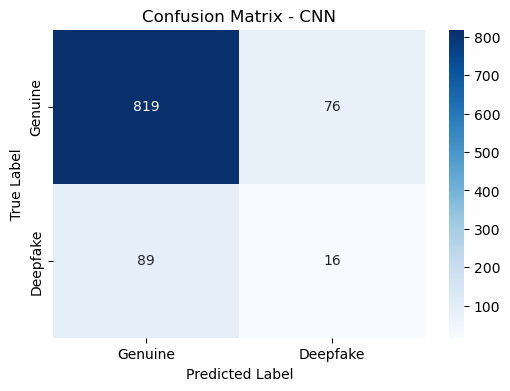

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

🔹 Model: LSTM
Accuracy: 0.8950
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.94       895
         1.0       0.00      0.00      0.00       105

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.80      0.90      0.85      1000



C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chint\anaconda3\Lib\site-packages\sklea

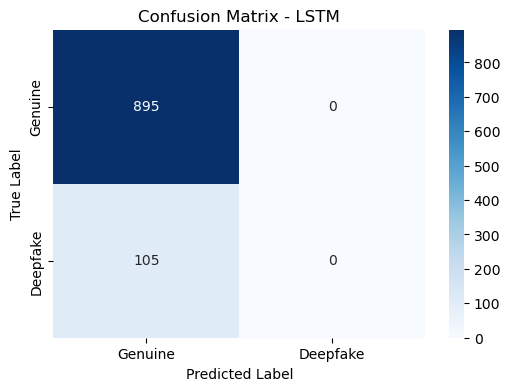

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step

🔹 Model: CNN-LSTM
Accuracy: 0.8950
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.94       895
         1.0       0.00      0.00      0.00       105

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.80      0.90      0.85      1000



C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chint\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chint\anaconda3\Lib\site-packages\sklea

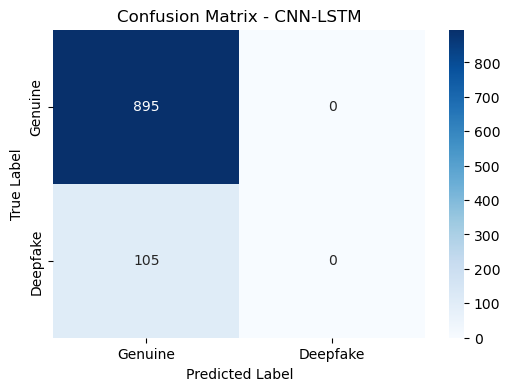

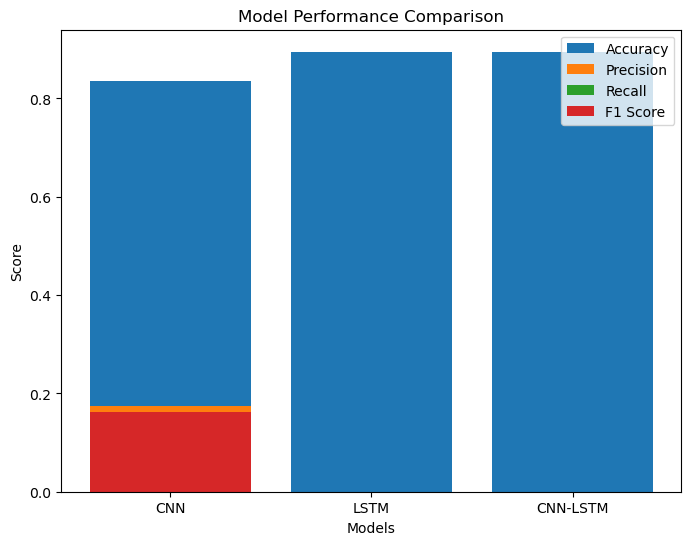

In [195]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n🔹 Model: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Genuine", "Deepfake"], yticklabels=["Genuine", "Deepfake"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return acc, precision, recall, f1

# Evaluate CNN model
cnn_metrics = evaluate_model(cnn_model, X_test_cnn, y_test, "CNN")

# Evaluate LSTM model
lstm_metrics = evaluate_model(lstm_model, X_test_lstm, y_test, "LSTM")

# Evaluate CNN-LSTM model
cnn_lstm_metrics = evaluate_model(cnn_lstm_model, X_test_cnn_lstm, y_test, "CNN-LSTM")

# Compare Model Performance
models = ["CNN", "LSTM", "CNN-LSTM"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [cnn_metrics, lstm_metrics, cnn_lstm_metrics]

# Plot comparison bar chart
plt.figure(figsize=(8, 6))
for i, metric in enumerate(metrics):
    plt.bar(models, [v[i] for v in values], label=metric)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()


In [201]:
# Before training
pre_train_preds = cnn_model.predict(X_test_cnn)
pre_train_acc = accuracy_score(y_test, (pre_train_preds > 0.5).astype(int))

# Train the model (fine-tuning step)
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# After training
post_train_preds = cnn_model.predict(X_test_cnn)
post_train_acc = accuracy_score(y_test, (post_train_preds > 0.5).astype(int))

print(f"Accuracy before training: {pre_train_acc:.4f}")
print(f"Accuracy after training: {post_train_acc:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9720 - loss: 0.0921 - val_accuracy: 0.8690 - val_loss: 1.0956
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9867 - loss: 0.0505 - val_accuracy: 0.8730 - val_loss: 1.1487
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9879 - loss: 0.0487 - val_accuracy: 0.8720 - val_loss: 1.1895
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9879 - loss: 0.0382 - val_accuracy: 0.8800 - val_loss: 1.2401
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9892 - loss: 0.0428 - val_accuracy: 0.8730 - val_loss: 1.1635
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9878 - loss: 0.0435 - val_accuracy: 0.8690 - val_loss: 1.2200
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9913 - loss: 0.0390 - val_accuracy: 0.8790 - val_loss: 1.3452
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9918 - l

In [203]:
cnn_model.save("fine_tuned_cnn_model.h5")
lstm_model.save("fine_tuned_lstm_model.h5")
cnn_lstm_model.save("fine_tuned_cnn_lstm_model.h5")
